The aim of this project is try try out various Data Visualisation Techniques. This also serves as a Refresher for myself regarding Pandas, Matplotlib and NumPy.

### 1. Importing

In [508]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

births_p1_df = pd.read_csv('assets/US_births_1994-2003_CDC_NCHS.csv')
births_p2_df = pd.read_csv('assets/US_births_2000-2014_SSA.csv')

Since two parts of our dataset is obtained from different sources, we have to see if the overlaps are identical

In [509]:
print(births_p1_df[births_p1_df.year==2000].head())
print(f'\n')
print(births_p2_df[births_p2_df.year==2000].head())

      year  month  date_of_month  day_of_week  births
2191  2000      1              1            6    8843
2192  2000      1              2            7    7816
2193  2000      1              3            1   11123
2194  2000      1              4            2   12703
2195  2000      1              5            3   12240


   year  month  date_of_month  day_of_week  births
0  2000      1              1            6    9083
1  2000      1              2            7    8006
2  2000      1              3            1   11363
3  2000      1              4            2   13032
4  2000      1              5            3   12558


From observation, we can see that they aren't identical. For the sake of this data testing, I will be simply removing the entries in `births_p1_df` that contains data from the year 2000-2003.

In [510]:
births_p1_df = births_p1_df[births_p1_df.year<=1999]
births_df = pd.concat([births_p1_df, births_p2_df])

***

### 2. Exploring Dataset

In this section, the goal is just to have a brief look through the dataset to get a gist of what it contains.

In [511]:
# Finding Header
print(births_df.columns)

Index(['year', 'month', 'date_of_month', 'day_of_week', 'births'], dtype='object')


In [512]:
# Finding out the dimensions of the Dataset
print(f"There are {births_df.shape[0]} rows and {births_df.shape[1]} columns")

There are 7670 rows and 5 columns


In [513]:
# Taking a look at the first 4 rows
print(births_df.head(4))
print(f'\n')

# Taking a look at the last 4 rows
print(births_df.tail(4))
print(f'\n')

   year  month  date_of_month  day_of_week  births
0  1994      1              1            6    8096
1  1994      1              2            7    7772
2  1994      1              3            1   10142
3  1994      1              4            2   11248


      year  month  date_of_month  day_of_week  births
5475  2014     12             28            7    7724
5476  2014     12             29            1   12811
5477  2014     12             30            2   13634
5478  2014     12             31            3   11990




By taking a look at the 'head' and the 'tail' of the dataset, we are able to know the range of the values. In this case, we know that the dataset ranges from the date 01/01/1994 to 31/12/2014. 

Alternatively, we can simply print it to get the rough look of the head and tail as well using `print(births_df)`. This will also give us the dimensions.

In [514]:
print(births_df)

      year  month  date_of_month  day_of_week  births
0     1994      1              1            6    8096
1     1994      1              2            7    7772
2     1994      1              3            1   10142
3     1994      1              4            2   11248
4     1994      1              5            3   11053
...    ...    ...            ...          ...     ...
5474  2014     12             27            6    8656
5475  2014     12             28            7    7724
5476  2014     12             29            1   12811
5477  2014     12             30            2   13634
5478  2014     12             31            3   11990

[7670 rows x 5 columns]


Now, we take a look at the given stats in the dataset using `df.describe()`.

In [515]:
# Finding out the overall stats
print(births_df.describe())

              year        month  date_of_month  day_of_week        births
count  7670.000000  7670.000000    7670.000000  7670.000000   7670.000000
mean   2004.000000     6.523077      15.729205     3.999870  11175.063625
std       6.055444     3.448888       8.800483     2.000359   2183.379461
min    1994.000000     1.000000       1.000000     1.000000   5728.000000
25%    1999.000000     4.000000       8.000000     2.000000   8786.250000
50%    2004.000000     7.000000      16.000000     4.000000  11981.000000
75%    2009.000000    10.000000      23.000000     6.000000  12816.000000
max    2014.000000    12.000000      31.000000     7.000000  16081.000000


In [516]:
# Finding year & day with highest & lowest number of births
print(births_df.sort_values('births'))

      year  month  date_of_month  day_of_week  births
4376  2011     12             25            7    5728
4011  2010     12             25            6    6159
3646  2009     12             25            5    6160
2185  2005     12             25            7    6224
1820  2004     12             25            6    6259
...    ...    ...            ...          ...     ...
2441  2006      9              7            4   15454
2918  2007     12             28            5   15555
2917  2007     12             27            4   15590
3286  2008     12             30            2   15645
3539  2009      9              9            3   16081

[7670 rows x 5 columns]


From this, we can determine that: 
<br> On 25 Dec 2011, Sunday, it had the lowest number of births 
<br> On 9 Sept 2009, Wednesday, it has the highest number of births

In [517]:
# Printing Top 10 days with least Number of Births
print(births_df.sort_values('births').head(10))

      year  month  date_of_month  day_of_week  births
4376  2011     12             25            7    5728
4011  2010     12             25            6    6159
3646  2009     12             25            5    6160
2185  2005     12             25            7    6224
1820  2004     12             25            6    6259
4742  2012     12             25            2    6325
2550  2006     12             25            1    6409
3281  2008     12             25            4    6471
4453  2012      3             11            7    6497
4019  2011      1              2            7    6540


Here's an interesting observation. The Top 8 Days with the Least Number of Births happens on Christmas.

***

### 3. Cleaning Dataset

Although this Dataset was obtained from a reliable source, we still do the usual of looking through and ensuring that the Dataset is clean.
<br/>
Things that we're looking out for:

1. There is no row with NaN or missing data.
2. There is indeed data from the years {1994} to {2014}.
3. It accounts for everyday of the week, from Monday to Sunday.

Firstly, we resolve point 1.

In [518]:
births_df = births_df.dropna()
print(f"now, all the rows with any field empty will have been removed")

now, all the rows with any field empty will have been removed


Now, we're just doing a simple check through for points 2. and 3.

In [519]:
years = births_df.year.unique().tolist()
print(years)

[1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]


In [520]:
print(births_df.day_of_week.unique())

[6 7 1 2 3 4 5]


In [521]:
days = births_df.date_of_month.unique().tolist()
print(days)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


***

### 4. Sorting & Plotting Dataset

For the purpose of this dataset, there are few interesting things I think would be useful to be seen visualised. 
</br> 
in the following format of {y} against {x}:

1. Total number of births against year
2. Average number of births against year
3. Average number of births against day of the week
4. Average number of births against month of the year

Therefore, we need to split the original dataset into seperate datasets. For a majority of these graphs, a Bar Graph would be the most useful.

In [522]:
def plot_bargraph(dataset: pd.DataFrame, x_axis: str, y_axis: str, y_lim: list[int], labels: list[str], width: float=0.5) -> None:
    plt.bar(dataset[x_axis], dataset[y_axis], width, color='salmon')
    plt.ylim(y_lim)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.title(labels[2])
    plt.show()

#### 4.1. Graph of Total Number of Births against Year

In [523]:
# First, we create a new dataframe that contains the total number of births for the corresponding years 
births_against_year_df = births_df.groupby(['year'])['births'].sum().reset_index()

print(births_against_year_df)

    year   births
0   1994  3952767
1   1995  3899589
2   1996  3891494
3   1997  3880894
4   1998  3941553
5   1999  3959417
6   2000  4149598
7   2001  4110963
8   2002  4099313
9   2003  4163060
10  2004  4186863
11  2005  4211941
12  2006  4335154
13  2007  4380784
14  2008  4310737
15  2009  4190991
16  2010  4055975
17  2011  4006908
18  2012  4000868
19  2013  3973337
20  2014  4010532


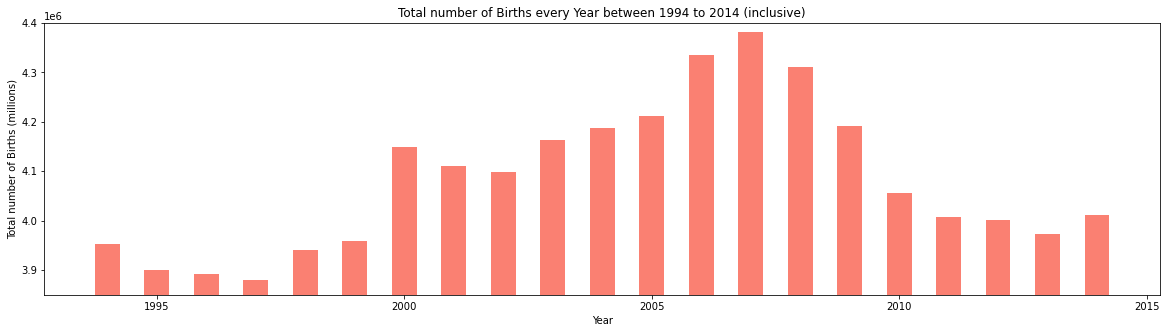

In [524]:
fig = plt.figure(figsize = (20, 5))
plot_bargraph(births_against_year_df, 
        'year', 
        'births', 
        [3850000, 4400000], 
        ['Year','Total number of Births (millions)', 'Total number of Births every Year between 1994 to 2014 (inclusive)']
        )

Visually, we are able to see that 2007 is the year with the highest amount of Births and 1997 is the year with the least.

#### 4.2 Graph of Average number of Births against Year

In [525]:
# We create a new dataframe that contains the average number of births for the corresponding years 
avg_births_against_year_df = births_df.groupby(['year'])['births'].mean().reset_index().sort_values('births')

print(avg_births_against_year_df)

    year        births
2   1996  10632.497268
3   1997  10632.586301
1   1995  10683.805479
4   1998  10798.775342
0   1994  10829.498630
5   1999  10847.717808
19  2013  10885.854795
18  2012  10931.333333
17  2011  10977.830137
20  2014  10987.758904
16  2010  11112.260274
8   2002  11230.994521
7   2001  11262.912329
6   2000  11337.699454
9   2003  11405.643836
10  2004  11439.516393
15  2009  11482.167123
11  2005  11539.564384
14  2008  11777.969945
12  2006  11877.134247
13  2007  12002.147945


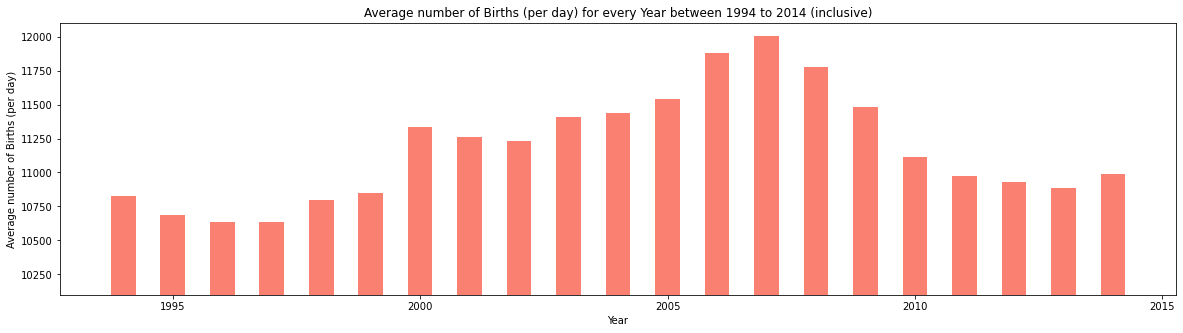

In [526]:
graph2 = births_df.groupby(['year'])['births'].mean().reset_index()
fig = plt.figure(figsize = (20, 5))
plot_bargraph(avg_births_against_year_df, 
        'year', 
        'births', 
        [10100, 12100], 
        ['Year','Average number of Births (per day)', 'Average number of Births (per day) for every Year between 1994 to 2014 (inclusive)']
        )

This time around, it is harder to see via just observation whether 1996/1997 is the year with the least. However, we know that 2007 is still the year with the most.
</br> In this case, thankfully, we are able to see the exact numbers so we know that 1996 is the year with the least average number of Births.

This fact is interesting because 1997 was the year with the least **Total Number** of Births but 1996 was the year with the least **Average Number** of Births.

#### 4.3 Graph of Average Number of Births against the Day of the Week

In [527]:
# We create a new dataframe that contains the average number of births for the corresponding day of the week
avg_births_against_dotw_df = births_df.groupby(['day_of_week'])['births'].mean().reset_index()

# We add a new column denoting the actual Names for the day of the week as opposed to integer values so that it is clearer when visualised.
avg_births_against_dotw_df['day'] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

print(avg_births_against_dotw_df)

   day_of_week        births        day
0            1  11606.728102     Monday
1            2  12841.802920    Tuesday
2            3  12620.875000  Wednesday
3            4  12551.800913   Thursday
4            5  12349.235616     Friday
5            6   8621.960766   Saturday
6            7   7635.369526     Sunday


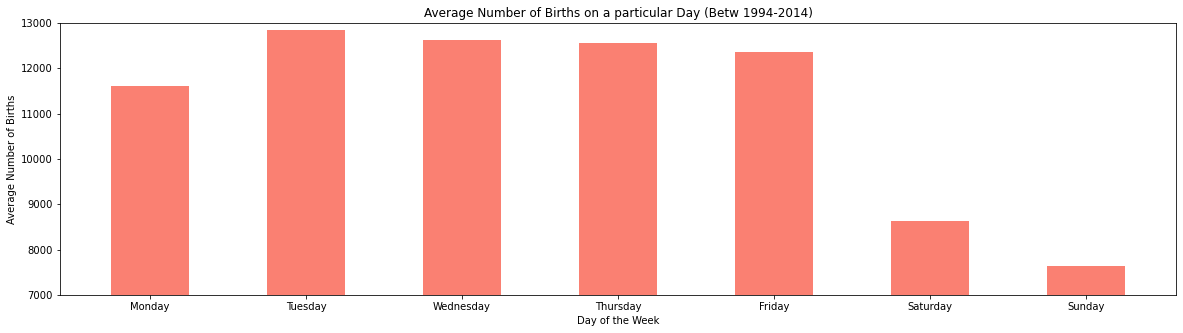

In [528]:
fig = plt.figure(figsize = (20, 5))
plot_bargraph(avg_births_against_dotw_df, 
        'day', 
        'births', 
        [7000,13000], 
        ['Day of the Week','Average Number of Births', 'Average Number of Births on a particular Day (Betw 1994-2014)'],
        )

Now this is a cool observation! The weekends has the least average Number of Births by a long shot. What could the reason for this? 

#### 4.4 Graph of Average Number of Births against the Day of the Month

In [529]:
# We create a new dataframe that contains the average number of births for the corresponding day of the week
avg_births_against_dotm_df = births_df.groupby(['date_of_month'])['births'].mean().reset_index().sort_values('births')

print(avg_births_against_dotm_df)

    date_of_month        births
24             25  10795.011905
30             31  10872.986395
23             24  10938.761905
12             13  10942.285714
25             26  10944.182540
0               1  10974.361111
3               4  10978.670635
22             23  11104.845238
4               5  11109.083333
1               2  11111.186508
26             27  11119.888889
5               6  11141.460317
2               3  11167.706349
8               9  11202.857143
10             11  11217.591270
28             29  11219.317797
27             28  11221.523810
29             30  11232.142857
6               7  11257.567460
21             22  11265.107143
7               8  11274.071429
18             19  11276.654762
15             16  11284.186508
9              10  11294.317460
11             12  11301.134921
14             15  11318.019841
13             14  11333.301587
16             17  11336.432540
17             18  11336.952381
20             21  11361.488095
19      

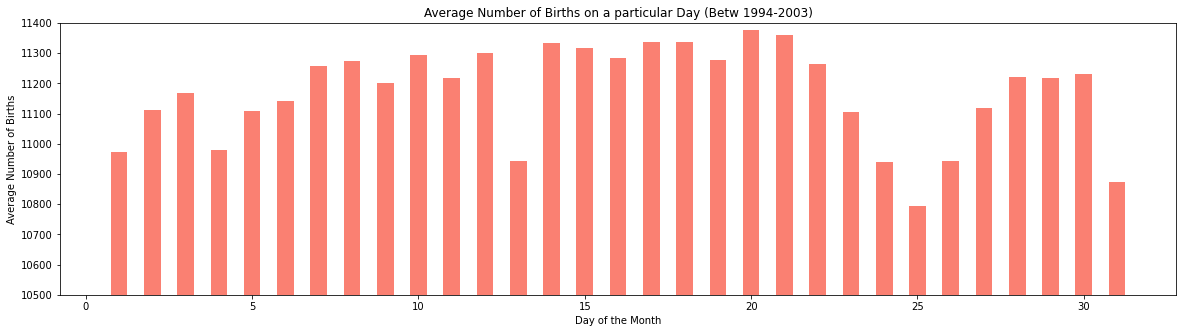

In [530]:
fig = plt.figure(figsize = (20, 5))
plot_bargraph(avg_births_against_dotm_df, 
        'date_of_month', 
        'births', 
        [10500,11400], 
        ['Day of the Month','Average Number of Births', 'Average Number of Births on a particular Day (Betw 1994-2003)'],
        )

From obversation, we know that 25th has the least and 20th has the most. An interesting trend thing to note is that it is mostly increasing from the 1st to 23rd of a month (if we ignore 1st, 4th and 13th of the month). Both the ends of the months have a low number of Births as well.

***

### 5. More Vigorous Sorting(Filtering) & Plotting of Dataset

Now that we've looked through the normal Datasets and answered some basic questions, let's do something more interesting. Let us filter through the data for specific scenarios.

1. Number of occurences of >= Average Number of Births on a Monday
2. Number of occurences of < Average Number of Births on a Monday
3. Number of occurences of >= Average Number of Birthss for the First Day of a Month
4. Number of occurences of < Average Number of Births for the First Day of a Month

In [531]:
def plot_stemgraphs_noniterative(x_axis: list[str], y_axis: list[int], labels: list[str], plot_num: int) -> None:
    plt.bar(x_axis, y_axis, width = 1.0, color = 'salmon')
    plt.subplot(1, 2, plot_num+1)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.title(labels[2])

As obtained earlier using `pd.describe()`, the Average Number of Births is 11175.063625 ~ 11200. 

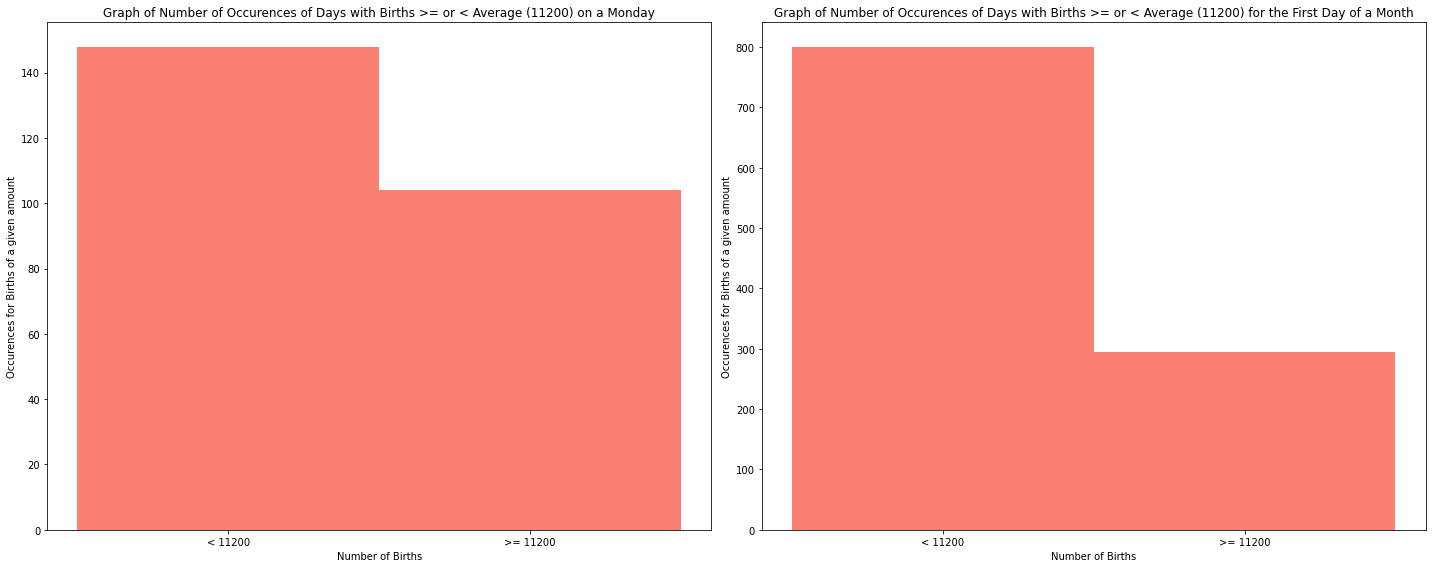

In [532]:
# Counting value for 1. and 2.
num_births_mt11200_dotw = len(births_df[(births_df.births >= 11200) & (births_df.day_of_week == 1)].index)
num_births_lt11200_dotw = len(births_df[(births_df.births < 11200) & (births_df.day_of_week == 1)].index)

# Counting value for 3. and 4.
num_births_mt11200_day1 = len(births_df[(births_df.births >= 11200) & (births_df.date_of_month == 1)].index)
num_births_lt11200_day1 = len(births_df[(births_df.births < 11200) & (births_df.date_of_month == 1)].index)

# Creating params for Graph
x_axis = [['< 11200', '>= 11200'], ['< 11200', '>= 11200']]
y_axis = [[num_births_mt11200_dotw, num_births_lt11200_dotw], [num_births_mt11200_day1, num_births_lt11200_day1]]
labels = [
        ['Number of Births', 'Occurences for Births of a given amount','Graph of Number of Occurences of Days with Births >= or < Average (11200) on a Monday'],
        ['Number of Births', 'Occurences for Births of a given amount', 'Graph of Number of Occurences of Days with Births >= or < Average (11200) for the First Day of a Month']
        ]

# Creation of the Dataset for a clearer understanding of the numbers if need be
final_df = pd.DataFrame()
final_df['labels'] = ['dotw', 'dotw', 'dotm', 'dotm']
final_df['>= 11200'] = [num_births_mt11200_dotw, pd.NA, num_births_lt11200_dotw, pd.NA]
final_df['< 11200'] = [pd.NA, num_births_mt11200_day1, pd.NA, num_births_lt11200_day1]
final_df = final_df.set_index('labels')

# Setting number of rows and cols for subplot
plt.subplots(1, 2, figsize = (20,8))

# Ploting iteratively
for plot_num in range(0, 2):
    plot_stemgraphs_noniterative(x_axis[plot_num], y_axis[plot_num], labels[plot_num], plot_num)

plt.tight_layout()
plt.show()

From this, we observe something very significant. On the first day of every Month, there is a high chance that there will be less than the average number of births of 11175.063625 ~ 11200. However, it is not significant for Monday of every Month.

***

### 6. Spotting Trends

In this section, we will replot the past few graphs, but of a different type to better observe trends.

#### 6.1 Does the Year affect the Total Number of Births?

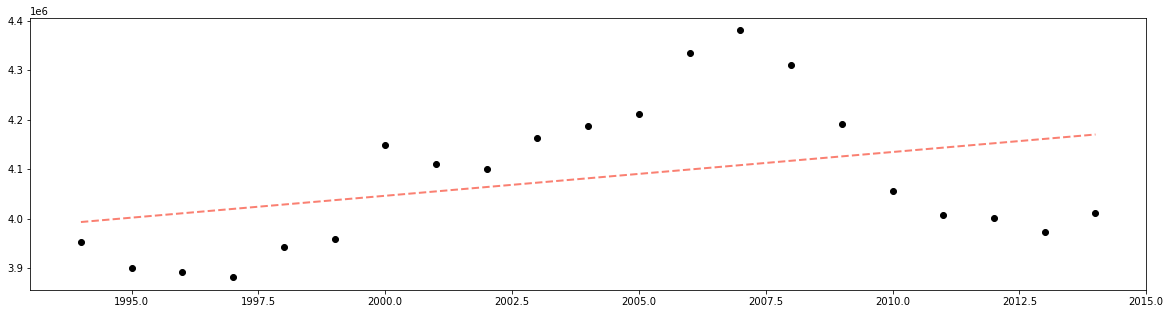

In [533]:
fig = plt.figure(figsize = (20, 5))
x = births_against_year_df['year'] 
y = births_against_year_df['births']

# Formulating the bestfit line
a, b = np.polyfit(x, y, 1)

# Plot scatterplot of the dataset
plt.scatter(x, y, color='black')

# Drawing bestfit line onto graph
plt.plot(x, a*x+b, linestyle='--', linewidth=2, color='salmon')
plt.show()

This linear best fit line doesn't really work. This means that the relationship between the Year and the Total number of Births isn't Linear. Therefore, it makes sense to perform Polynomial Regression Instead.

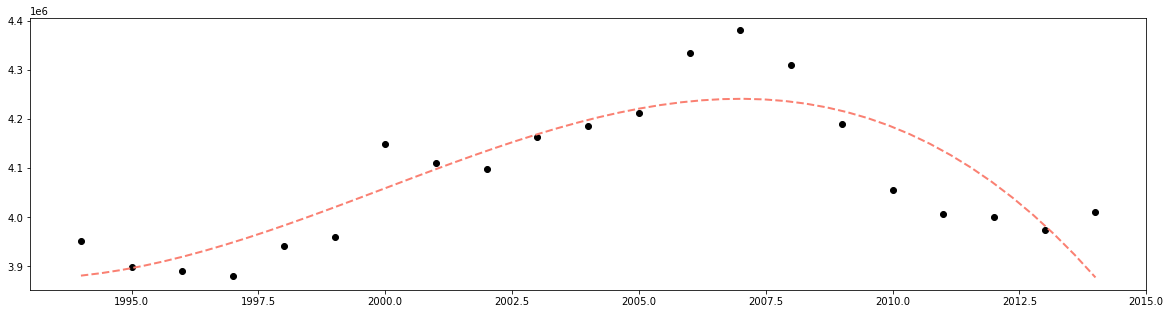

In [534]:
fig = plt.figure(figsize = (20, 5))

# Formulating the polynomial fit line of degree {3}
model = np.poly1d(np.polyfit(x, y, 3))
polyline = np.linspace(1994, 2014)

# Plot scatterplot of the dataset
plt.scatter(x, y, color='black')

# Drawing polynomial fit onto graph
plt.plot(polyline, model(polyline), linestyle='--', linewidth=2, color='salmon')
plt.show()

#### 6.2 Does the Day of the Month determine the Number of Births for that particular day?

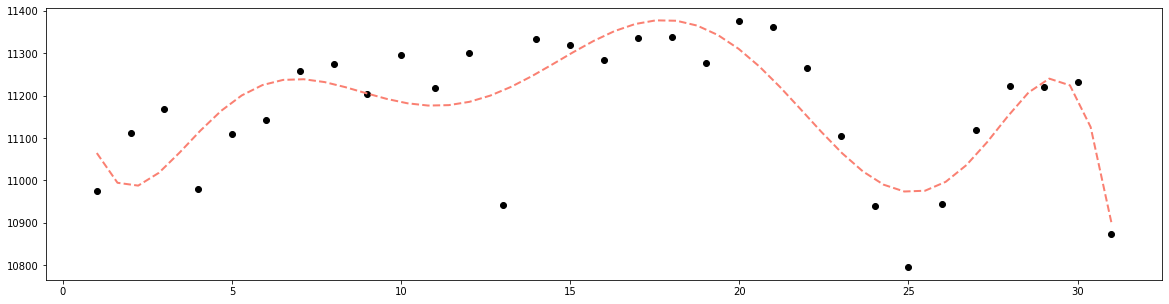

In [535]:
fig = plt.figure(figsize = (20, 5))
x = avg_births_against_dotm_df['date_of_month'] 
y = avg_births_against_dotm_df['births']

# Formulating the polynomial fit line of degree {7} 
model = np.poly1d(np.polyfit(x, y, 7))
polyline = np.linspace(1, 31)

# Plot scatterplot of the dataset
plt.scatter(x, y, color='black')

# Drawing polynomial fit onto graph
plt.plot(polyline, model(polyline), linestyle='--', linewidth=2, color='salmon')
plt.show()

Remember that the Number that you set for the degree of the polynomial fit is important. If you set a number that is too high, it can result in overfitting.

It is interesting to see here that when a scattergraph is used, certain things stand out more and are more visually obvious. For example, in this scattergraph, we can now see that on the 25th of every Month, the Number of Births is drastically lower than the rest. This is also the case for the 31st of every month.

***